# **Laboratorijska vježba 2**: Zadaci za samostalni rad

## **Podaci o poznatim filmovima i njihovoj zaradi**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka o popularnim filmovima (blockbusterima) te njihov financijski učinak. Skup podataka dostupan je u *Data/blockbusters.csv*. 

U nastavku je dan sažetak stupaca (značajki) u skupu podataka:

*   Main_Genre - primarni žanr filma
*   Genre_2 
*   Genre_3
*   imdb_rating
*   length - duljina filma u minutama
*   rank_in_year - rank u top 10 filmova objavljenih te godine
*   rating - ocjena publike
*   studio - studio koji je producirao film
*   title - naslov filma
*   worldwide_gross - ukupni prihod filma u svijetu u dolarima
*   year - godina objavljivanja

In [ ]:
!head Data/blockbusters.csv

Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
Action,Comedy,,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
Action,Comedy,,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
Action,Adventure,Drama,7,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'

movies = pd.read_csv(data_folder + 'blockbusters.csv')
movies.head(10)



,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
5,Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
6,Action,Comedy,NaN,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
7,Action,Adventure,Drama,7.0,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
8,Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018
9,Music,Drama,NaN,8.1,135,10,R,Warner Bros,A Star is Born,"$199,721,727",2018


## **Zadatak 1: Vizualizacija jedne varijable**

Koristeći naučeno znanje, Vaš je zadatak vizualizirati jednu varijablu koristeći biblioteku Matplotlib. Usredotočite se na stupac 'worldwide_gross' te istražite njegovu distribuciju pomoću histograma i dijagrama pravokutnika. Svaki dijagram mora imati prikladno označene osi i naslov (koristite metode *plt.xlabel()*, *plt.ylabel()* i *plt.title()*). 

In [ ]:
movies["worldwide_gross"] = movies["worldwide_gross"].str.replace(r",", "").str[1:].astype(float)
movies

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,41833347.0,1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,39000000.0,1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0,1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose",35000000.0,1975


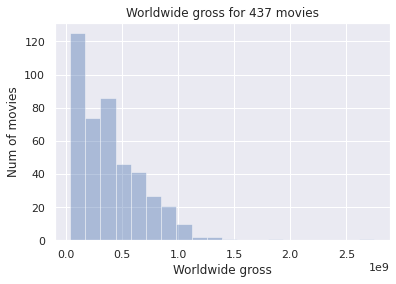

In [ ]:
movie_prices = movies["worldwide_gross"] 
plt.hist(movie_prices, bins=20, alpha=0.4)
plt.xlabel('Worldwide gross') 
plt.ylabel('Num of movies') 
plt.title('Worldwide gross for 437 movies')
plt.show()


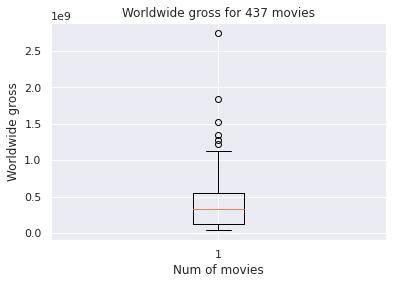

In [ ]:
#ax = sns.boxplot(x=len(movies), y='worldwide_gross', data=movies)

plt.boxplot(movie_prices)
plt.xlabel('Num of movies') 
plt.ylabel('Worldwide gross') 
plt.title('Worldwide gross for 437 movies')
plt.show()

## **Zadatak 2: Vizualizacija dviju kontinuiranih varijabli**

Provjerite ispravnost tvrdnje da blockbusteri s većim IMDB rejtingom ujedno ostvaruju i više prihoda. To možete postići vizualizacijom odnosa između dviju varijabli koje sadrže ove informacije, pri čemu je za vizualizaciju prikladno koristiti dijagram raspršenosti.

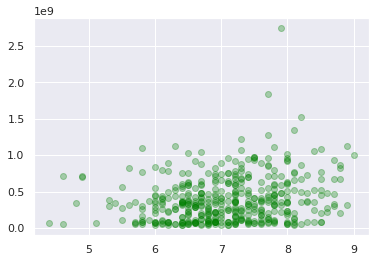

In [ ]:
x =  movies['imdb_rating']
y = movies['worldwide_gross']  #numericke vrijednosti

plt.scatter(x, y, marker='o', color='green', alpha=0.3)

Na dijagram dodajte tzv. "*best-fit*" pravac koji se koristi za izražavanje odnosa različitih podatkovnih točaka u dijagramu raspršenosti. Ovaj pravac predstavlja pravac koji je najmanje udaljen od svih točaka na grafu. 

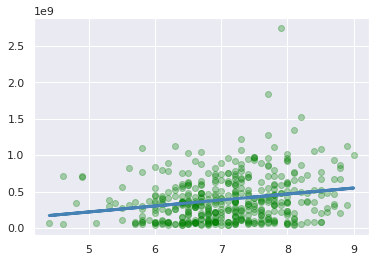

In [ ]:
#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y,  color='green', alpha=0.3)

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linewidth=3)

Uz vizualizaciju, odnos dviju kontinuiranih varijabli možete numerički iskazati izračunavanjem korelacije. Pomoću biblioteke Pandas izračunajte korelaciju između ovih varijabli te ju ispravno protumačite.

In [ ]:
correlation = movies['imdb_rating'].corr(movies['worldwide_gross'])
print(correlation)

#blago koreliraju 

0.21325728109060602


Uz odnos ovih dviju varijabli, bilo bi zanimljivo prikazati i razlike u njihovim distribucijama. Ove razlike možete vizualizirati zajedničkim dijagramom (jointplot iz biblioteke Seaborn) koji ujedno prikazuje njihov dijagram raspršenosti te distribucije pomoću stupčastih dijagrama. Prokomentirajte razliku u distribucijama ovih dviju varijabli.

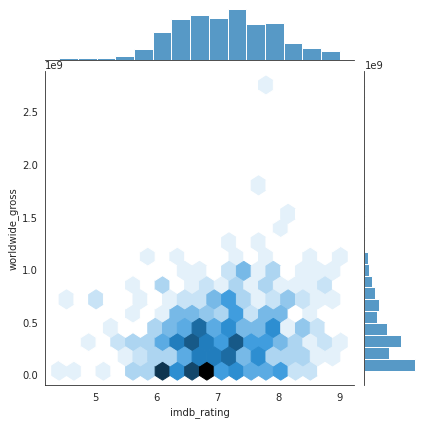

In [ ]:
data ={'imdb_rating':x, 'worldwide_gross':y}
dataF = pd.DataFrame(data)

with sns.axes_style('white'):
  sns.jointplot(data=dataF, x='imdb_rating', y='worldwide_gross', kind='hex')

## **Zadatak 3: Vizualizacija odnosa kontinuirane i kategoričke varijable**

Razmotrite pet najzastupljenijih žanrova te ispitajte njihove prihode. Vizualizirajte odnos između ovih varijabli koristeći stupčasti dijagram, dijagram pravokutnika te violinske dijagrame. 

Thriller    63
Comedy      55
Fantasy     54
Sci-Fi      50
Romance     48
Name: Main_Genre, dtype: int64


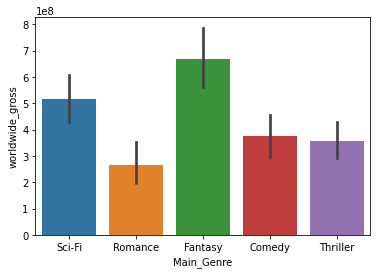

In [ ]:
top5_genres = movies["Main_Genre"].value_counts().head()
top_genre_movies = movies[(movies["Main_Genre"].isin(top5_genres.keys()))]

#stupčasti dijagram
ax = sns.barplot(data=top_genre_movies, x="Main_Genre", y="worldwide_gross")

print(top5_genres)
#print(top_genre_movies)

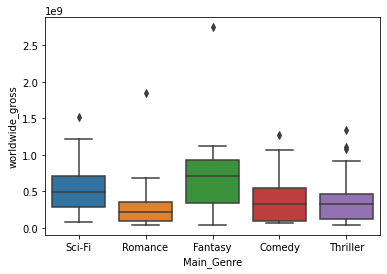

In [ ]:
# dijagram pravokutnika
ax = sns.boxplot(x='Main_Genre', y='worldwide_gross', data=top_genre_movies)

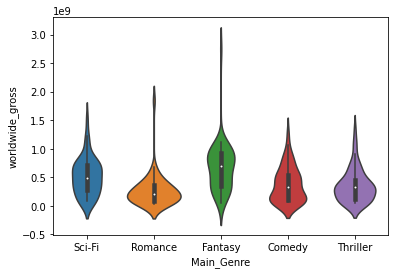

In [ ]:
# violinski dijagram
ax = sns.violinplot(x='Main_Genre', y='worldwide_gross', data=top_genre_movies)

## **Zadatak 4: Vizualizacija neizvjesnosti**

Pokušajte odgovoriti na pitanje kako bi se kretao prosječni prihod od blockbustera? Vizualizirajte prosječni godišnji svjetski bruto prihod, zajedno sa standardnom devijacijom. Devijaciju možete vizualizirati pomoću vizualizacije grešaka, odnosno metoda *errorbar* i *fill_between* iz biblioteke Matplotlib. Pomoć: grupirajte retke DataFrame-a prema godini te primijenite prikladnu metodu agregacije nad stupcem od interesa.

Je li se prosječni prihod povećao ili smanjio tijekom vremena? Što opažate?

<ErrorbarContainer object of 3 artists>

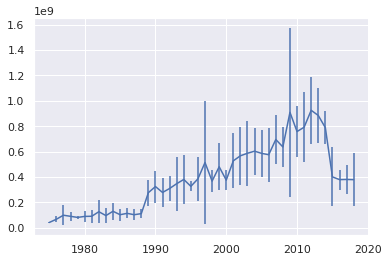

In [ ]:
years = movies.groupby('year')  
yerr = years['worldwide_gross'].std()

x = years['worldwide_gross'].mean().index
y = years['worldwide_gross'].mean()


plt.errorbar(x, y, yerr=yerr)


## **Zadatak 5: Stvaranje višestrukih dijagrama**

Nadalje, pokušajmo razumjeti koliko dugo blockbusteri traju u različitim žanrovima. Kad radite s velikim brojem kategorija (postoji 16 žanrova u skupu podataka), vizualizacije se lako zatrpaju i postaju nepregledne. Tada je korisno grupirati dijagrame u višestruke dijagrame. 

Napravite višestruki dijagram koji se sastoji od mreže od 4x4 dijagrama za 16 filmskih žanrova. U svakom poddijagramu prikažite histogram s distribucijom duljine filma za različite kategorije. Odgovorite na pitanje kojim žanrovima pripadaju najduži filmovi? Što možete reći o duljini komedija i animiranih filmova?

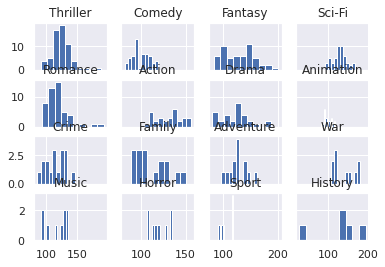

In [ ]:
genres=movies['Main_Genre'].value_counts()
genres= list(genres.keys())


fig, ax = plt.subplots(4, 4, sharex='col', sharey='row')

for i in range(4):
  for j in range(4):
    genre = genres[4*i+j]
    ax[i,j].hist(x=movies.query("Main_Genre==@genre").length)
    ax[i,j].set_title(genre)

## **Zadatak 6: Toplinske karte (Heatmaps)**

Zadnje što nas zanima jest koji filmski studiji izrađuju blockbustere za koji žanr. Postoji mnogo studija i mnogo žanrova. Pri radu s dvije varijable koje obje imaju mnogo različitih kategorija, često nema prostora za predstavljanje svake kombinacije dviju kategorija s posebnim dijagramom (kao što je stupčasti dijagram ili dijagram pravokutnika). U tom slučaju, postaje korisno predstaviti njihov odnos pomoću toplinske karte, gdje brojevi predstavljaju broj kombinacija koji se pojavljuje u skupu podataka. 

Vizualizirajte broj blockbustera koje je napravio svaki studio za svaki žanr. Pomoć: koristite metodu *heatmap()* iz biblioteke Seaborn.

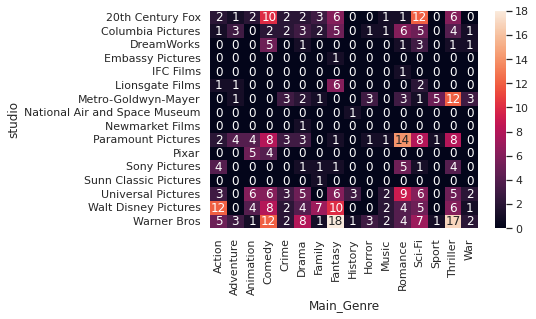

In [ ]:
import seaborn as sns
sns.set()

df=pd.crosstab(movies.studio, movies.Main_Genre)
ax=sns.heatmap(data=df, annot=True)

#data = [[movies['studio']][movies['Main_Genre']]]
#data = np.array([movies['studio']],[movies['Main_Genre']])
#sns.heatmap(data)


Pomoću izrađene vizualizacije, pokušajte odgovoriti na sljedeća pitanja:

*   U koje žanrove spada većina filmova koje snima studio Warner Bros?
*   Koji je najuspješniji žanr filmskih filmova Walta Disneya?
*   Koji je studio napravio najveći broj ljubavnih blockbustera?

